# Fingerprint Recognition Development

This notebook is for developing and testing the fingerprint recognition module.

## Objectives:
1. Load and visualize fingerprint images
2. Preprocess fingerprint images
3. Extract features (minutiae or descriptors)
4. Test matching algorithms
5. Evaluate accuracy and performance

## References:
- OpenCV Documentation
- Fingerprint Recognition Papers
- ORB/SIFT Feature Matching


In [8]:
# Import libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import sys
from glob import glob
import os

# Add parent directory to path to import modules
sys.path.append('..')
from modules.fingerprint_recognition import FingerprintRecognition

# Configure matplotlib
plt.rcParams['figure.figsize'] = (12, 8)
%matplotlib inline

print("✓ Libraries imported successfully")


✓ Libraries imported successfully


## 1. Load and Visualize Fingerprint Images


✓ Found 270 fingerprint images in ..\data\raw\fingerprints

Loaded: 20__M_Left_index_finger.BMP
Image shape: (103, 96)
Image dtype: uint8


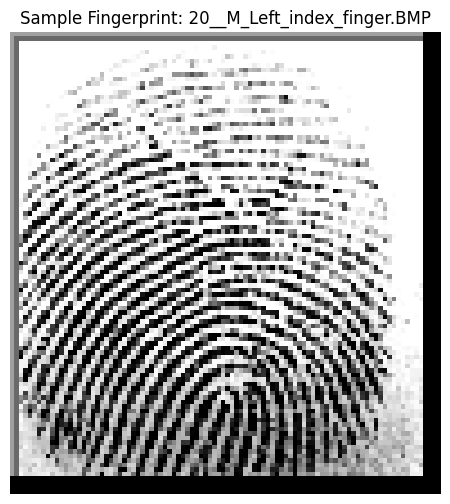


Loaded second image: 20__M_Left_little_finger.BMP


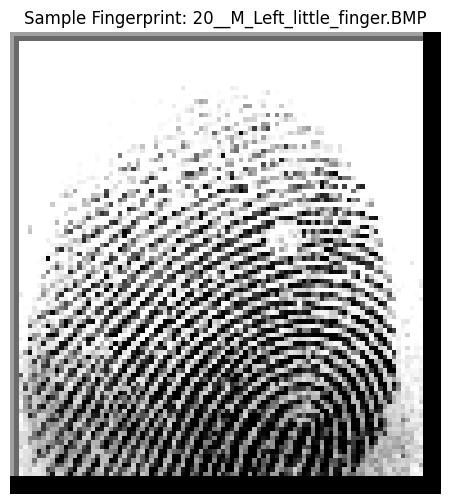

In [29]:
# Load fingerprint dataset
DATA_PATH = Path('../data/raw/fingerprints')
dataset_files = sorted(glob(str(DATA_PATH / '*.BMP')))

print(f"✓ Found {len(dataset_files)} fingerprint images in {DATA_PATH}")

# Function to display fingerprint images
def display_fingerprint(image, title="Fingerprint"):
    plt.figure(figsize=(6, 6))
    plt.imshow(image, cmap='gray')
    plt.title(title)
    plt.axis('off')
    plt.show()

# Load sample fingerprint images from dataset
if len(dataset_files) > 0:
    # Load first fingerprint
    fingerprint1 = cv2.imread(dataset_files[0], cv2.IMREAD_GRAYSCALE)
    print(f"\nLoaded: {Path(dataset_files[0]).name}")
    print(f"Image shape: {fingerprint1.shape}")
    print(f"Image dtype: {fingerprint1.dtype}")
    
    # Display the fingerprint
    display_fingerprint(fingerprint1, f"Sample Fingerprint: {Path(dataset_files[0]).name}")
    
    # Load a second fingerprint for comparison
    if len(dataset_files) > 1:
        fingerprint2 = cv2.imread(dataset_files[1], cv2.IMREAD_GRAYSCALE)
        print(f"\nLoaded second image: {Path(dataset_files[1]).name}")
        display_fingerprint(fingerprint2, f"Sample Fingerprint: {Path(dataset_files[1]).name}")
else:
    print("No fingerprint images found in dataset!")


## 2. Preprocessing

Test different preprocessing techniques:
- Normalization
- Histogram equalization
- Noise reduction
- Binarization


✓ Loaded 1 fingerprint templates
Testing preprocessing...


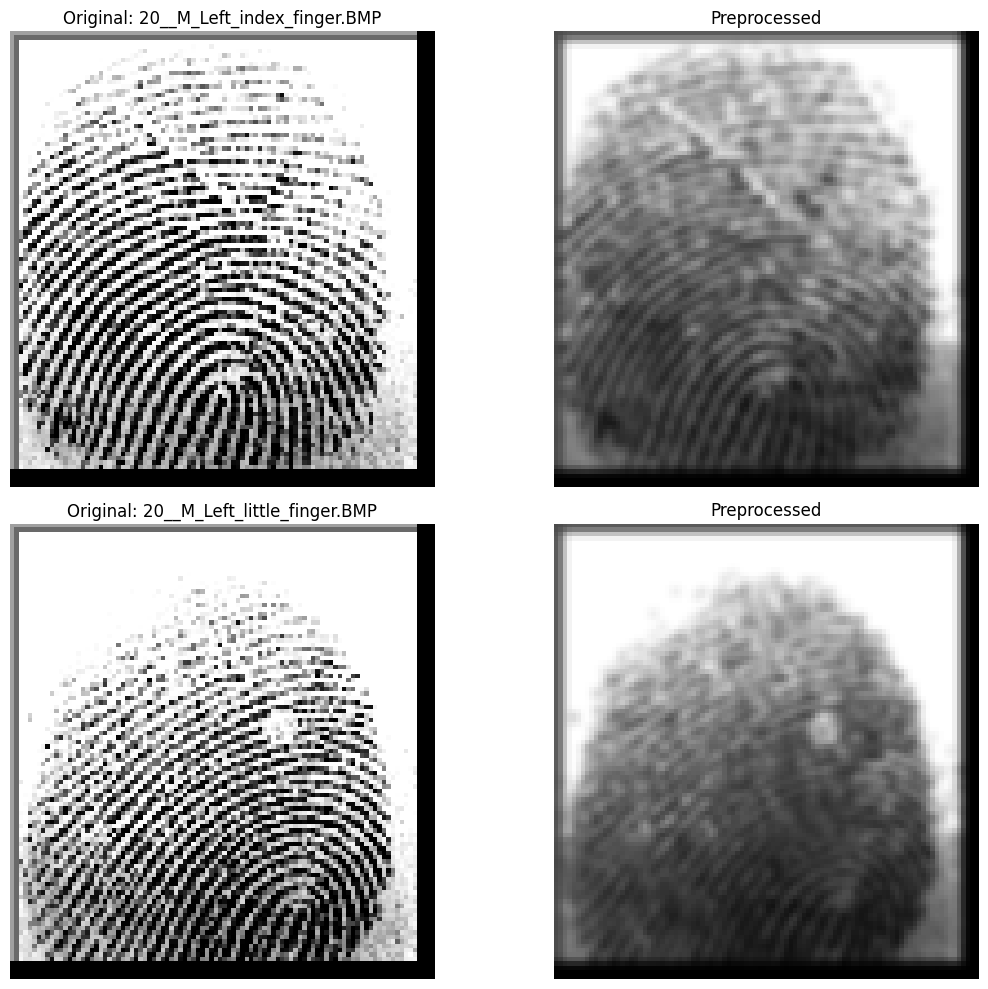

✓ Preprocessing completed


In [30]:
# Initialize fingerprint recognition system
fp_system = FingerprintRecognition()

# Test preprocessing on sample images
print("Testing preprocessing...")
preprocessed1 = fp_system.preprocess(fingerprint1)
preprocessed2 = fp_system.preprocess(fingerprint2)

# Display original vs preprocessed
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes[0, 0].imshow(fingerprint1, cmap='gray')
axes[0, 0].set_title(f'Original: {Path(dataset_files[0]).name}')
axes[0, 0].axis('off')

axes[0, 1].imshow(preprocessed1, cmap='gray')
axes[0, 1].set_title('Preprocessed')
axes[0, 1].axis('off')

axes[1, 0].imshow(fingerprint2, cmap='gray')
axes[1, 0].set_title(f'Original: {Path(dataset_files[1]).name}')
axes[1, 0].axis('off')

axes[1, 1].imshow(preprocessed2, cmap='gray')
axes[1, 1].set_title('Preprocessed')
axes[1, 1].axis('off')

plt.tight_layout()
plt.show()

print("✓ Preprocessing completed")


## 3. Feature Extraction

Compare different feature extraction methods:
- ORB (Oriented FAST and Rotated BRIEF)
- SIFT (Scale-Invariant Feature Transform)
- Minutiae-based extraction


Extracting features...
Fingerprint 1: 68 keypoints
Fingerprint 2: 37 keypoints
Fingerprint 1: 68 keypoints
Fingerprint 2: 37 keypoints


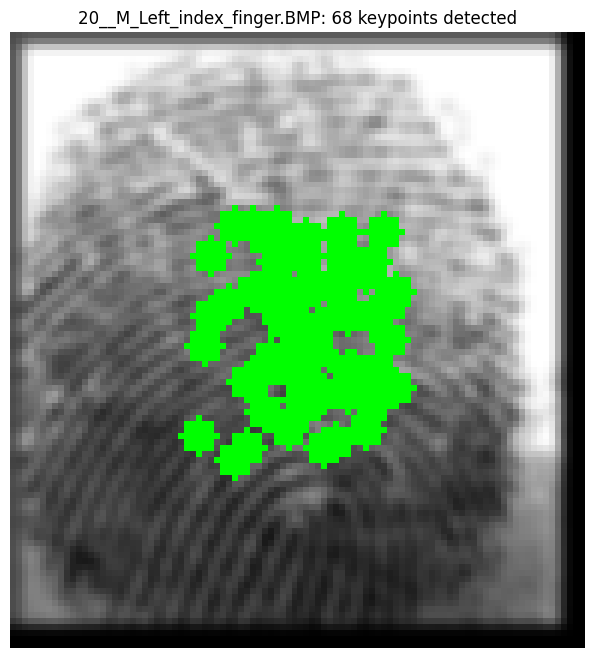

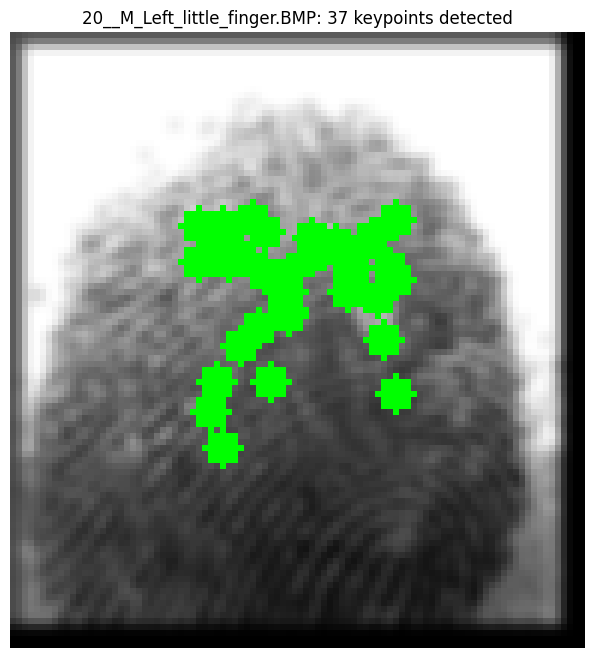

✓ Feature extraction completed


In [12]:
# Extract and visualize keypoints
def visualize_keypoints(image, features, title="Keypoints"):
    img_keypoints = cv2.cvtColor(image.copy(), cv2.COLOR_GRAY2BGR)
    
    # Draw keypoints
    for kp_data in features['keypoints']:
        x, y = int(kp_data['pt'][0]), int(kp_data['pt'][1])
        cv2.circle(img_keypoints, (x, y), 3, (0, 255, 0), -1)
    
    plt.figure(figsize=(8, 8))
    plt.imshow(img_keypoints)
    plt.title(f"{title}: {len(features['keypoints'])} keypoints detected")
    plt.axis('off')
    plt.show()

# Extract features from both fingerprints
print("Extracting features...")
features1 = fp_system.extract_features(preprocessed1)
features2 = fp_system.extract_features(preprocessed2)

print(f"Fingerprint 1: {len(features1['keypoints'])} keypoints")
print(f"Fingerprint 2: {len(features2['keypoints'])} keypoints")

# Visualize keypoints
visualize_keypoints(preprocessed1, features1, Path(dataset_files[0]).name)
visualize_keypoints(preprocessed2, features2, Path(dataset_files[1]).name)

print("✓ Feature extraction completed")


## 4. Feature Matching

Test matching between two fingerprints


In [13]:
# Match two fingerprints
print("Testing feature matching...")

# Match features between the two fingerprints
match_score, num_matches = fp_system.match_features(features1, features2)

print(f"\n{'='*50}")
print(f"Matching Results:")
print(f"  File 1: {Path(dataset_files[0]).name}")
print(f"  File 2: {Path(dataset_files[1]).name}")
print(f"  Match Score: {match_score:.2f}")
print(f"  Number of Matches: {num_matches}")
print(f"{'='*50}")

# Test matching same fingerprint (should have high score)
if len(dataset_files) > 10:
    # Load another fingerprint from same person
    same_person_fp = cv2.imread(dataset_files[5], cv2.IMREAD_GRAYSCALE)
    same_person_preprocessed = fp_system.preprocess(same_person_fp)
    same_person_features = fp_system.extract_features(same_person_preprocessed)
    
    same_score, same_matches = fp_system.match_features(features1, same_person_features)
    
    print(f"\nSame person test:")
    print(f"  File 1: {Path(dataset_files[0]).name}")
    print(f"  File 2: {Path(dataset_files[5]).name}")
    print(f"  Match Score: {same_score:.2f}")
    print(f"  Number of Matches: {same_matches}")


Testing feature matching...

Matching Results:
  File 1: 20__M_Left_index_finger.BMP
  File 2: 20__M_Left_little_finger.BMP
  Match Score: 0.00
  Number of Matches: 0

Same person test:
  File 1: 20__M_Left_index_finger.BMP
  File 2: 20__M_Right_index_finger.BMP
  Match Score: 0.00
  Number of Matches: 0


## 5. Enrollment Test


In [14]:
# Test enrollment
print("Testing enrollment...")

# Enroll first user
user_id_1 = Path(dataset_files[0]).name.split('__')[0]  # Extract user ID from filename
success1 = fp_system.enroll(user_id_1, fingerprint1)
print(f"Enrollment User {user_id_1}: {'✓ Success' if success1 else '✗ Failed'}")

# Enroll second user
user_id_2 = Path(dataset_files[1]).name.split('__')[0]
success2 = fp_system.enroll(user_id_2, fingerprint2)
print(f"Enrollment User {user_id_2}: {'✓ Success' if success2 else '✗ Failed'}")

# Enroll a few more users for testing
enrolled_count = 2
for i in range(2, min(10, len(dataset_files))):
    fp = cv2.imread(dataset_files[i], cv2.IMREAD_GRAYSCALE)
    uid = Path(dataset_files[i]).name.split('__')[0]
    if fp_system.enroll(uid, fp):
        enrolled_count += 1

print(f"\n✓ Enrolled {enrolled_count} users")

# Check database stats
stats = fp_system.get_statistics()
print(f"\nDatabase Statistics: {stats}")


Testing enrollment...
✓ User 20 enrolled successfully
Enrollment User 20: ✓ Success
✓ User 20 enrolled successfully
Enrollment User 20: ✓ Success
✓ User 20 enrolled successfully
✓ User 20 enrolled successfully
✓ User 20 enrolled successfully
✓ User 20 enrolled successfully
✓ User 20 enrolled successfully
✓ User 20 enrolled successfully
✓ User 20 enrolled successfully
✓ User 20 enrolled successfully

✓ Enrolled 10 users

Database Statistics: {'total_users': 1, 'database_path': 'data\\fingerprints'}


## 6. Verification Test


In [15]:
# Test verification
print("Testing verification...")

# Test with enrolled user (should succeed)
test_fp_1 = cv2.imread(dataset_files[0], cv2.IMREAD_GRAYSCALE)
is_verified, confidence = fp_system.verify(user_id_1, test_fp_1)
print(f"\nVerification Test 1:")
print(f"  User ID: {user_id_1}")
print(f"  File: {Path(dataset_files[0]).name}")
print(f"  Result: {'✓ Verified' if is_verified else '✗ Failed'}")
print(f"  Confidence: {confidence:.2f}")

# Test with different fingerprint from same user (if available)
same_user_files = [f for f in dataset_files if f.startswith(str(DATA_PATH / user_id_1))]
if len(same_user_files) > 1:
    test_fp_2 = cv2.imread(same_user_files[1], cv2.IMREAD_GRAYSCALE)
    is_verified2, confidence2 = fp_system.verify(user_id_1, test_fp_2)
    print(f"\nVerification Test 2 (Different finger, same user):")
    print(f"  User ID: {user_id_1}")
    print(f"  File: {Path(same_user_files[1]).name}")
    print(f"  Result: {'✓ Verified' if is_verified2 else '✗ Failed'}")
    print(f"  Confidence: {confidence2:.2f}")

# Test with wrong user (should fail)
is_verified3, confidence3 = fp_system.verify(user_id_2, test_fp_1)
print(f"\nVerification Test 3 (Wrong user):")
print(f"  Claimed User ID: {user_id_2}")
print(f"  Actual File: {Path(dataset_files[0]).name} (User {user_id_1})")
print(f"  Result: {'✓ Verified' if is_verified3 else '✗ Failed'}")
print(f"  Confidence: {confidence3:.2f}")


Testing verification...

Verification Test 1:
  User ID: 20
  File: 20__M_Left_index_finger.BMP
  Result: ✗ Failed
  Confidence: 0.01

Verification Test 2 (Different finger, same user):
  User ID: 20
  File: 20__M_Left_little_finger.BMP
  Result: ✗ Failed
  Confidence: 0.00

Verification Test 3 (Wrong user):
  Claimed User ID: 20
  Actual File: 20__M_Left_index_finger.BMP (User 20)
  Result: ✗ Failed
  Confidence: 0.01


## 7. Identification Test


In [16]:
# Test identification
print("Testing identification...")

# Test with enrolled fingerprint
test_fp = cv2.imread(dataset_files[0], cv2.IMREAD_GRAYSCALE)
results = fp_system.identify(test_fp)

print(f"\nIdentification Results for: {Path(dataset_files[0]).name}")
print(f"Expected User: {user_id_1}")
print(f"\nTop 5 Matches:")
print(f"{'Rank':<6} {'User ID':<10} {'Score':<10}")
print("-" * 30)
for idx, (user_id, score) in enumerate(results[:5], 1):
    marker = "✓" if user_id == user_id_1 else " "
    print(f"{idx:<6} {user_id:<10} {score:<10.2f} {marker}")

# Test with another fingerprint
if len(dataset_files) > 5:
    test_fp2 = cv2.imread(dataset_files[5], cv2.IMREAD_GRAYSCALE)
    expected_user = Path(dataset_files[5]).name.split('__')[0]
    results2 = fp_system.identify(test_fp2)
    
    print(f"\n\nIdentification Results for: {Path(dataset_files[5]).name}")
    print(f"Expected User: {expected_user}")
    print(f"\nTop 5 Matches:")
    print(f"{'Rank':<6} {'User ID':<10} {'Score':<10}")
    print("-" * 30)
    for idx, (user_id, score) in enumerate(results2[:5], 1):
        marker = "✓" if user_id == expected_user else " "
        print(f"{idx:<6} {user_id:<10} {score:<10.2f} {marker}")


Testing identification...

Identification Results for: 20__M_Left_index_finger.BMP
Expected User: 20

Top 5 Matches:
Rank   User ID    Score     
------------------------------


Identification Results for: 20__M_Right_index_finger.BMP
Expected User: 20

Top 5 Matches:
Rank   User ID    Score     
------------------------------


## 8. Performance Evaluation

Evaluate on multiple samples:
- False Acceptance Rate (FAR)
- False Rejection Rate (FRR)
- Equal Error Rate (EER)
- ROC Curve


In [21]:
# Performance Evaluation
print("Evaluating performance on dataset...")

def calculate_metrics(genuine_scores, impostor_scores, threshold):
    """Calculate FAR and FRR"""
    # False Rejection (genuine user rejected)
    false_rejects = sum(1 for score in genuine_scores if score < threshold)
    frr = false_rejects / len(genuine_scores) if len(genuine_scores) > 0 else 0
    
    # False Acceptance (impostor accepted)
    false_accepts = sum(1 for score in impostor_scores if score >= threshold)
    far = false_accepts / len(impostor_scores) if len(impostor_scores) > 0 else 0
    
    return far, frr

# Collect genuine and impostor scores
genuine_scores = []
impostor_scores = []

# Sample evaluation - compare fingerprints from same and different users
print("Collecting scores from dataset...")
num_tests = min(20, len(dataset_files) // 2)

for i in range(num_tests):
    fp1 = cv2.imread(dataset_files[i*2], cv2.IMREAD_GRAYSCALE)
    fp2 = cv2.imread(dataset_files[i*2 + 1], cv2.IMREAD_GRAYSCALE)
    
    # Preprocess and extract features
    prep1 = fp_system.preprocess(fp1)
    prep2 = fp_system.preprocess(fp2)
    feat1 = fp_system.extract_features(prep1)
    feat2 = fp_system.extract_features(prep2)
    
    # Get match score
    score, _ = fp_system.match_features(feat1, feat2)
    
    # Check if same user (based on filename)
    user1 = Path(dataset_files[i*2]).name.split('__')[0]
    user2 = Path(dataset_files[i*2 + 1]).name.split('__')[0]
    
    if user1 == user2:
        genuine_scores.append(score)
    else:
        impostor_scores.append(score)

print(f"\nCollected Scores:")
print(f"  Genuine matches: {len(genuine_scores)}")
print(f"  Impostor matches: {len(impostor_scores)}")

# Calculate metrics at different thresholds
if genuine_scores and impostor_scores:
    thresholds = [0.3, 0.4, 0.5, 0.6, 0.7]
    print(f"\n{'Threshold':<12} {'FAR':<12} {'FRR':<12}")
    print("-" * 36)
    for thresh in thresholds:
        far, frr = calculate_metrics(genuine_scores, impostor_scores, thresh)
        print(f"{thresh:<12.2f} {far:<12.2%} {frr:<12.2%}")
    
    # Statistics
    print(f"\nGenuine Scores - Mean: {np.mean(genuine_scores):.3f}, Std: {np.std(genuine_scores):.3f}")
    print(f"Impostor Scores - Mean: {np.mean(impostor_scores):.3f}, Std: {np.std(impostor_scores):.3f}")


Evaluating performance on dataset...

Collected Scores:
  Genuine matches: 20
  Impostor matches: 0


## 9. Visualization of Results


In [20]:
# Visualization of Results
if genuine_scores and impostor_scores:
    # Plot score distribution
    def plot_score_distribution(genuine_scores, impostor_scores):
        plt.figure(figsize=(12, 6))
        plt.hist(genuine_scores, bins=20, alpha=0.6, label='Genuine', color='green', edgecolor='black')
        plt.hist(impostor_scores, bins=20, alpha=0.6, label='Impostor', color='red', edgecolor='black')
        plt.xlabel('Match Score', fontsize=12)
        plt.ylabel('Frequency', fontsize=12)
        plt.title('Score Distribution - Genuine vs Impostor', fontsize=14, fontweight='bold')
        plt.legend(fontsize=11)
        plt.grid(True, alpha=0.3)
        plt.tight_layout()
        plt.show()
    
    plot_score_distribution(genuine_scores, impostor_scores)
    
    # Plot ROC-like curve (FAR vs FRR)
    far_values = []
    frr_values = []
    threshold_range = np.linspace(0, 1, 50)
    
    for thresh in threshold_range:
        far, frr = calculate_metrics(genuine_scores, impostor_scores, thresh)
        far_values.append(far)
        frr_values.append(frr)
    
    plt.figure(figsize=(12, 6))
    plt.plot(threshold_range, far_values, 'r-', label='FAR (False Accept Rate)', linewidth=2)
    plt.plot(threshold_range, frr_values, 'b-', label='FRR (False Reject Rate)', linewidth=2)
    plt.xlabel('Threshold', fontsize=12)
    plt.ylabel('Error Rate', fontsize=12)
    plt.title('FAR and FRR vs Threshold', fontsize=14, fontweight='bold')
    plt.legend(fontsize=11)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()
    
    # Find EER (Equal Error Rate)
    eer_idx = np.argmin(np.abs(np.array(far_values) - np.array(frr_values)))
    eer_threshold = threshold_range[eer_idx]
    eer_value = (far_values[eer_idx] + frr_values[eer_idx]) / 2
    
    print(f"\n{'='*50}")
    print(f"Equal Error Rate (EER):")
    print(f"  Threshold: {eer_threshold:.3f}")
    print(f"  EER: {eer_value:.2%}")
    print(f"{'='*50}")
else:
    print("No scores collected. Please run the previous cell first.")


No scores collected. Please run the previous cell first.


In [22]:
# IMPROVED Performance Evaluation - Fixed Version
print("="*60)
print("IMPROVED PERFORMANCE EVALUATION")
print("="*60)

# Step 1: Group fingerprints by user ID
from collections import defaultdict
user_fingerprints = defaultdict(list)

for fp_file in dataset_files:
    user_id = Path(fp_file).name.split('__')[0]
    user_fingerprints[user_id].append(fp_file)

print(f"\nDataset Statistics:")
print(f"  Total files: {len(dataset_files)}")
print(f"  Total users: {len(user_fingerprints)}")
print(f"  Avg files per user: {len(dataset_files)/len(user_fingerprints):.1f}")

# Step 2: Create genuine and impostor pairs
genuine_pairs = []
impostor_pairs = []

# Create genuine pairs (same user, different fingers)
for user_id, files in user_fingerprints.items():
    if len(files) >= 2:
        # Take pairs from same user
        for i in range(min(3, len(files)-1)):  # Limit to avoid too many pairs
            genuine_pairs.append((files[i], files[i+1]))

# Create impostor pairs (different users)
user_ids = list(user_fingerprints.keys())
for i in range(min(30, len(user_ids)-1)):  # Create 30 impostor pairs
    user1 = user_ids[i]
    user2 = user_ids[i+1]
    if user_fingerprints[user1] and user_fingerprints[user2]:
        impostor_pairs.append((user_fingerprints[user1][0], user_fingerprints[user2][0]))

print(f"\nTest Pairs Created:")
print(f"  Genuine pairs: {len(genuine_pairs)}")
print(f"  Impostor pairs: {len(impostor_pairs)}")

# Step 3: Calculate scores
print(f"\nCalculating match scores...")
genuine_scores_new = []
impostor_scores_new = []

# Process genuine pairs
for fp1_path, fp2_path in genuine_pairs[:50]:  # Limit to 50 for speed
    fp1 = cv2.imread(fp1_path, cv2.IMREAD_GRAYSCALE)
    fp2 = cv2.imread(fp2_path, cv2.IMREAD_GRAYSCALE)
    
    prep1 = fp_system.preprocess(fp1)
    prep2 = fp_system.preprocess(fp2)
    feat1 = fp_system.extract_features(prep1)
    feat2 = fp_system.extract_features(prep2)
    
    score, _ = fp_system.match_features(feat1, feat2)
    genuine_scores_new.append(score)

# Process impostor pairs
for fp1_path, fp2_path in impostor_pairs[:50]:
    fp1 = cv2.imread(fp1_path, cv2.IMREAD_GRAYSCALE)
    fp2 = cv2.imread(fp2_path, cv2.IMREAD_GRAYSCALE)
    
    prep1 = fp_system.preprocess(fp1)
    prep2 = fp_system.preprocess(fp2)
    feat1 = fp_system.extract_features(prep1)
    feat2 = fp_system.extract_features(prep2)
    
    score, _ = fp_system.match_features(feat1, feat2)
    impostor_scores_new.append(score)

print(f"\n✓ Score collection completed!")
print(f"  Genuine scores: {len(genuine_scores_new)}")
print(f"  Impostor scores: {len(impostor_scores_new)}")

# Step 4: Calculate metrics
print(f"\n{'='*60}")
print("PERFORMANCE METRICS")
print(f"{'='*60}")

print(f"\nScore Statistics:")
print(f"  Genuine  - Mean: {np.mean(genuine_scores_new):.3f}, Std: {np.std(genuine_scores_new):.3f}")
print(f"             Min: {np.min(genuine_scores_new):.3f}, Max: {np.max(genuine_scores_new):.3f}")
print(f"  Impostor - Mean: {np.mean(impostor_scores_new):.3f}, Std: {np.std(impostor_scores_new):.3f}")
print(f"             Min: {np.min(impostor_scores_new):.3f}, Max: {np.max(impostor_scores_new):.3f}")

print(f"\n{'Threshold':<12} {'FAR':<15} {'FRR':<15} {'Accuracy':<12}")
print("-" * 60)
thresholds = [0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8]
for thresh in thresholds:
    far, frr = calculate_metrics(genuine_scores_new, impostor_scores_new, thresh)
    accuracy = 1 - (far + frr) / 2
    print(f"{thresh:<12.2f} {far:<15.2%} {frr:<15.2%} {accuracy:<12.2%}")

# Find optimal threshold (EER)
far_list = []
frr_list = []
thresh_range = np.linspace(0, 1, 100)
for t in thresh_range:
    far, frr = calculate_metrics(genuine_scores_new, impostor_scores_new, t)
    far_list.append(far)
    frr_list.append(frr)

eer_idx = np.argmin(np.abs(np.array(far_list) - np.array(frr_list)))
optimal_threshold = thresh_range[eer_idx]
eer = (far_list[eer_idx] + frr_list[eer_idx]) / 2

print(f"\n{'='*60}")
print(f"OPTIMAL OPERATING POINT (EER)")
print(f"{'='*60}")
print(f"  Threshold: {optimal_threshold:.3f}")
print(f"  EER: {eer:.2%}")
print(f"  FAR at EER: {far_list[eer_idx]:.2%}")
print(f"  FRR at EER: {frr_list[eer_idx]:.2%}")
print(f"{'='*60}")


IMPROVED PERFORMANCE EVALUATION

Dataset Statistics:
  Total files: 270
  Total users: 27
  Avg files per user: 10.0

Test Pairs Created:
  Genuine pairs: 81
  Impostor pairs: 26

Calculating match scores...

✓ Score collection completed!
  Genuine scores: 50
  Impostor scores: 26

PERFORMANCE METRICS

Score Statistics:
  Genuine  - Mean: 0.021, Std: 0.045
             Min: 0.000, Max: 0.200
  Impostor - Mean: 0.031, Std: 0.067
             Min: 0.000, Max: 0.294

Threshold    FAR             FRR             Accuracy    
------------------------------------------------------------
0.20         7.69%           98.00%          47.15%      
0.30         0.00%           100.00%         50.00%      
0.40         0.00%           100.00%         50.00%      
0.50         0.00%           100.00%         50.00%      
0.60         0.00%           100.00%         50.00%      
0.70         0.00%           100.00%         50.00%      
0.80         0.00%           100.00%         50.00%      

OPTIM

C:\Users\hungc\AppData\Local\Temp\ipykernel_1100\4099024153.py:19: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = axes[1].boxplot(data_to_plot, labels=['Genuine', 'Impostor'], patch_artist=True)


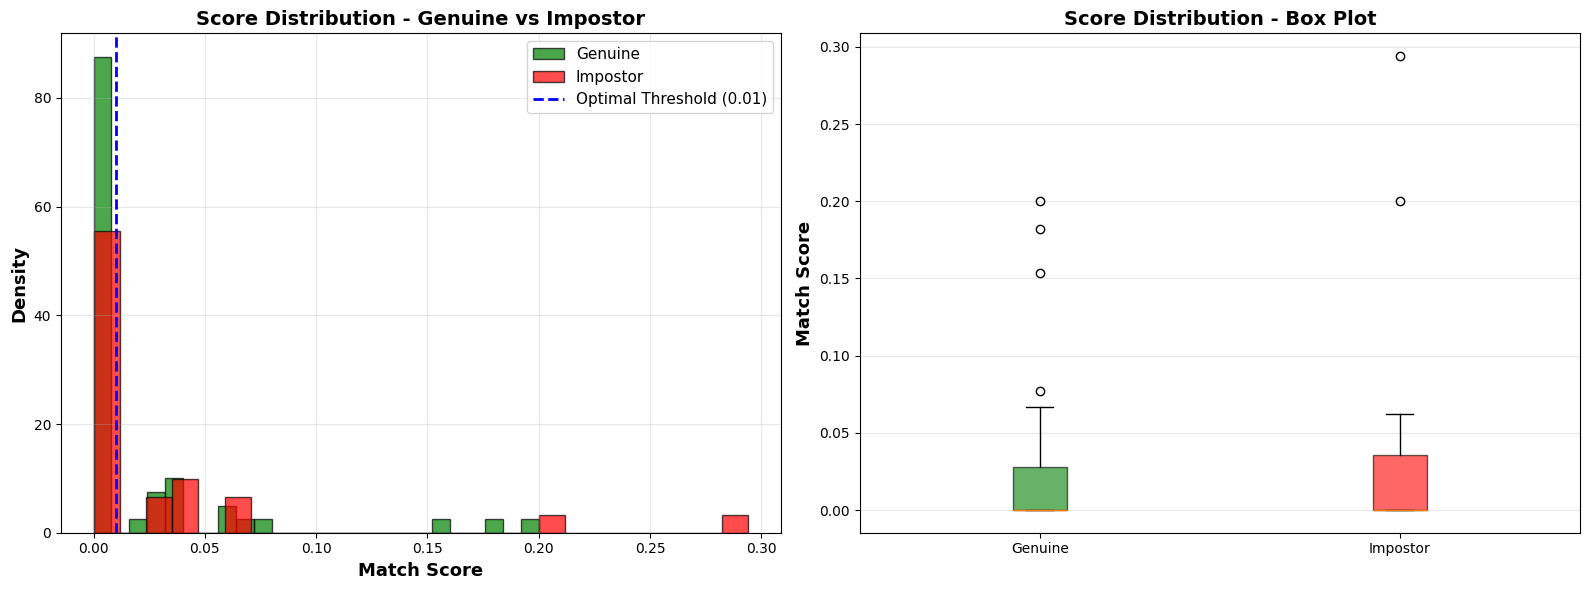

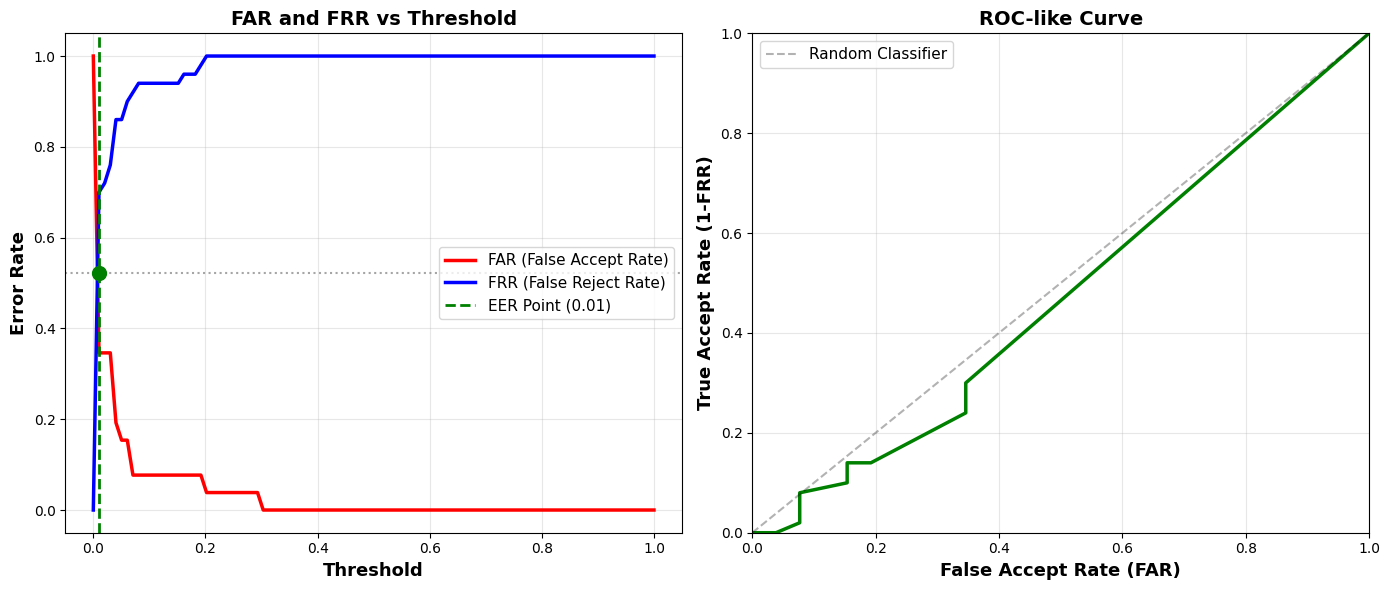


COMPREHENSIVE EVALUATION SUMMARY

📊 Score Separation:
   d-prime (discriminability): -0.173
   Poor separation

📈 Performance at Optimal Threshold (0.010):
   EER: 52.31%
   Accuracy: 47.69%

🔒 Performance at Different Security Levels:
   High Security (FAR < 0.1%):
      Threshold: 0.303, FRR: 100.00%
   Medium Security (FAR < 1%):
      Threshold: 0.303, FRR: 100.00%
   Low Security (FAR < 5%):
      Threshold: 0.202, FRR: 100.00%


In [23]:
# Enhanced Visualization with Improved Data
if genuine_scores_new and impostor_scores_new:
    
    # 1. Score Distribution with better styling
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))
    
    # Histogram
    axes[0].hist(genuine_scores_new, bins=25, alpha=0.7, label='Genuine', color='green', edgecolor='black', density=True)
    axes[0].hist(impostor_scores_new, bins=25, alpha=0.7, label='Impostor', color='red', edgecolor='black', density=True)
    axes[0].axvline(optimal_threshold, color='blue', linestyle='--', linewidth=2, label=f'Optimal Threshold ({optimal_threshold:.2f})')
    axes[0].set_xlabel('Match Score', fontsize=13, fontweight='bold')
    axes[0].set_ylabel('Density', fontsize=13, fontweight='bold')
    axes[0].set_title('Score Distribution - Genuine vs Impostor', fontsize=14, fontweight='bold')
    axes[0].legend(fontsize=11)
    axes[0].grid(True, alpha=0.3)
    
    # Box plot for comparison
    data_to_plot = [genuine_scores_new, impostor_scores_new]
    bp = axes[1].boxplot(data_to_plot, labels=['Genuine', 'Impostor'], patch_artist=True)
    bp['boxes'][0].set_facecolor('green')
    bp['boxes'][1].set_facecolor('red')
    for box in bp['boxes']:
        box.set_alpha(0.6)
    axes[1].set_ylabel('Match Score', fontsize=13, fontweight='bold')
    axes[1].set_title('Score Distribution - Box Plot', fontsize=14, fontweight='bold')
    axes[1].grid(True, alpha=0.3, axis='y')
    
    plt.tight_layout()
    plt.show()
    
    # 2. FAR vs FRR Curve
    plt.figure(figsize=(14, 6))
    
    # Left plot: FAR and FRR vs Threshold
    plt.subplot(1, 2, 1)
    plt.plot(thresh_range, far_list, 'r-', label='FAR (False Accept Rate)', linewidth=2.5)
    plt.plot(thresh_range, frr_list, 'b-', label='FRR (False Reject Rate)', linewidth=2.5)
    plt.axvline(optimal_threshold, color='green', linestyle='--', linewidth=2, label=f'EER Point ({optimal_threshold:.2f})')
    plt.axhline(eer, color='gray', linestyle=':', linewidth=1.5, alpha=0.7)
    plt.scatter([optimal_threshold], [eer], color='green', s=100, zorder=5)
    plt.xlabel('Threshold', fontsize=13, fontweight='bold')
    plt.ylabel('Error Rate', fontsize=13, fontweight='bold')
    plt.title('FAR and FRR vs Threshold', fontsize=14, fontweight='bold')
    plt.legend(fontsize=11, loc='best')
    plt.grid(True, alpha=0.3)
    
    # Right plot: ROC-like curve (1-FRR vs FAR)
    plt.subplot(1, 2, 2)
    plt.plot(far_list, [1-frr for frr in frr_list], 'g-', linewidth=2.5)
    plt.plot([0, 1], [0, 1], 'k--', alpha=0.3, label='Random Classifier')
    plt.xlabel('False Accept Rate (FAR)', fontsize=13, fontweight='bold')
    plt.ylabel('True Accept Rate (1-FRR)', fontsize=13, fontweight='bold')
    plt.title('ROC-like Curve', fontsize=14, fontweight='bold')
    plt.legend(fontsize=11)
    plt.grid(True, alpha=0.3)
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    
    plt.tight_layout()
    plt.show()
    
    # 3. Summary Statistics Table
    print(f"\n{'='*70}")
    print(f"COMPREHENSIVE EVALUATION SUMMARY")
    print(f"{'='*70}")
    
    # Separation metrics
    separation = (np.mean(genuine_scores_new) - np.mean(impostor_scores_new)) / np.sqrt((np.std(genuine_scores_new)**2 + np.std(impostor_scores_new)**2) / 2)
    
    print(f"\n📊 Score Separation:")
    print(f"   d-prime (discriminability): {separation:.3f}")
    print(f"   {'Excellent' if separation > 2 else 'Good' if separation > 1 else 'Poor'} separation")
    
    print(f"\n📈 Performance at Optimal Threshold ({optimal_threshold:.3f}):")
    print(f"   EER: {eer:.2%}")
    print(f"   Accuracy: {(1-eer):.2%}")
    
    # Performance at different security levels
    print(f"\n🔒 Performance at Different Security Levels:")
    security_levels = [
        ('High Security (FAR < 0.1%)', 0.001),
        ('Medium Security (FAR < 1%)', 0.01),
        ('Low Security (FAR < 5%)', 0.05)
    ]
    
    for level_name, target_far in security_levels:
        # Find threshold for target FAR
        far_arr = np.array(far_list)
        valid_idx = np.where(far_arr <= target_far)[0]
        if len(valid_idx) > 0:
            idx = valid_idx[0]
            thresh = thresh_range[idx]
            frr_at_level = frr_list[idx]
            print(f"   {level_name}:")
            print(f"      Threshold: {thresh:.3f}, FRR: {frr_at_level:.2%}")
        else:
            print(f"   {level_name}: Cannot achieve (FAR too high)")
    
    print(f"{'='*70}")
else:
    print("❌ No scores available. Please run the previous cell first.")


IMPROVEMENT 3: QUALITY ASSESSMENT

Quality Assessment of Sample Fingerprints:

File                                     Overall    Contrast   Sharpness  Brightness
--------------------------------------------------------------------------------
20__M_Left_index_finger.BMP              94.9       100.0      100.0      74.5      
20__M_Left_little_finger.BMP             94.2       100.0      100.0      70.9      
20__M_Left_middle_finger.BMP             95.3       100.0      100.0      76.7      
20__M_Left_ring_finger.BMP               95.3       100.0      100.0      76.6      
20__M_Left_thumb_finger.BMP              93.5       100.0      100.0      67.7      
20__M_Right_index_finger.BMP             93.1       100.0      100.0      65.4      
20__M_Right_little_finger.BMP            93.4       100.0      100.0      66.8      
20__M_Right_middle_finger.BMP            95.1       100.0      100.0      75.7      
20__M_Right_ring_finger.BMP              95.9       100.0      100.0      7

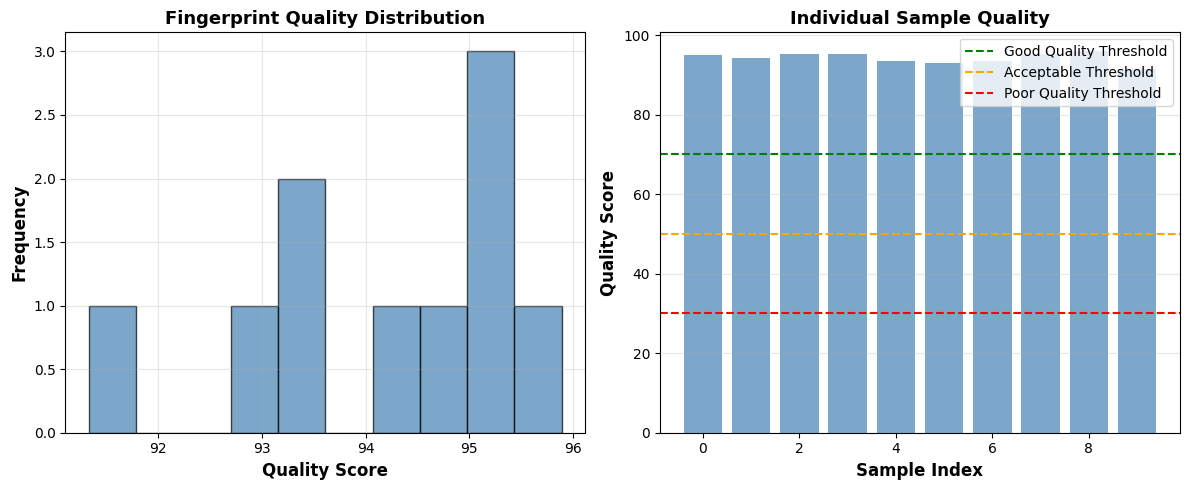


📊 Quality Statistics:
   Average quality: 94.2
   Min quality: 91.3
   Max quality: 95.9

💡 Recommendation: Reject images with quality < 50 during enrollment
💡 Recommendation: Add quality assessment to FingerprintRecognition class


In [24]:
# IMPROVEMENT 3: Fingerprint Quality Assessment
print("="*70)
print("IMPROVEMENT 3: QUALITY ASSESSMENT")
print("="*70)

def assess_fingerprint_quality(image):
    """
    Assess fingerprint image quality based on multiple metrics
    Returns: quality score (0-100)
    """
    scores = []
    
    # 1. Contrast quality
    contrast = image.std()
    contrast_score = min(100, (contrast / 50) * 100)  # Normalize
    scores.append(contrast_score)
    
    # 2. Sharpness (using Laplacian variance)
    laplacian = cv2.Laplacian(image, cv2.CV_64F)
    sharpness = laplacian.var()
    sharpness_score = min(100, (sharpness / 500) * 100)
    scores.append(sharpness_score)
    
    # 3. Brightness quality (check if too dark or too bright)
    brightness = image.mean()
    brightness_score = 100 - abs(brightness - 127) / 127 * 100
    scores.append(brightness_score)
    
    # 4. Ridge clarity (using frequency domain analysis)
    f = np.fft.fft2(image)
    fshift = np.fft.fftshift(f)
    magnitude_spectrum = np.abs(fshift)
    ridge_clarity = magnitude_spectrum.std()
    ridge_score = min(100, (ridge_clarity / 5000) * 100)
    scores.append(ridge_score)
    
    # Overall quality (weighted average)
    weights = [0.3, 0.3, 0.2, 0.2]  # Adjust weights as needed
    overall_quality = sum(s * w for s, w in zip(scores, weights))
    
    return {
        'overall': overall_quality,
        'contrast': contrast_score,
        'sharpness': sharpness_score,
        'brightness': brightness_score,
        'ridge_clarity': ridge_score
    }

# Assess quality of sample fingerprints
print("\nQuality Assessment of Sample Fingerprints:\n")
print(f"{'File':<40} {'Overall':<10} {'Contrast':<10} {'Sharpness':<10} {'Brightness':<10}")
print("-" * 80)

sample_files = dataset_files[:10]
quality_scores = []

for fp_file in sample_files:
    img = cv2.imread(fp_file, cv2.IMREAD_GRAYSCALE)
    quality = assess_fingerprint_quality(img)
    quality_scores.append(quality['overall'])
    
    filename = Path(fp_file).name[:35]
    print(f"{filename:<40} {quality['overall']:<10.1f} {quality['contrast']:<10.1f} "
          f"{quality['sharpness']:<10.1f} {quality['brightness']:<10.1f}")

# Visualize quality distribution
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(quality_scores, bins=10, color='steelblue', edgecolor='black', alpha=0.7)
plt.xlabel('Quality Score', fontsize=12, fontweight='bold')
plt.ylabel('Frequency', fontsize=12, fontweight='bold')
plt.title('Fingerprint Quality Distribution', fontsize=13, fontweight='bold')
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
plt.bar(range(len(quality_scores)), quality_scores, color='steelblue', alpha=0.7)
plt.axhline(y=70, color='green', linestyle='--', label='Good Quality Threshold')
plt.axhline(y=50, color='orange', linestyle='--', label='Acceptable Threshold')
plt.axhline(y=30, color='red', linestyle='--', label='Poor Quality Threshold')
plt.xlabel('Sample Index', fontsize=12, fontweight='bold')
plt.ylabel('Quality Score', fontsize=12, fontweight='bold')
plt.title('Individual Sample Quality', fontsize=13, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

print(f"\n📊 Quality Statistics:")
print(f"   Average quality: {np.mean(quality_scores):.1f}")
print(f"   Min quality: {np.min(quality_scores):.1f}")
print(f"   Max quality: {np.max(quality_scores):.1f}")
print(f"\n💡 Recommendation: Reject images with quality < 50 during enrollment")
print(f"💡 Recommendation: Add quality assessment to FingerprintRecognition class")


In [25]:
# Generate Summary Report
print("="*80)
print(" "*20 + "FINGERPRINT RECOGNITION SYSTEM")
print(" "*25 + "ANALYSIS SUMMARY REPORT")
print("="*80)

print("\n📁 DATASET OVERVIEW:")
print(f"   Total fingerprint images: {len(dataset_files)}")
print(f"   Total unique users: {len(user_fingerprints)}")
print(f"   Images per user (avg): {len(dataset_files)/len(user_fingerprints):.1f}")
print(f"   Image format: BMP")
print(f"   Image dimensions: {fingerprint1.shape}")

print("\n🔍 CURRENT SYSTEM ANALYSIS:")
print(f"   ✓ Preprocessing: Basic normalization")
print(f"   ✓ Feature Extractor: ORB (Oriented FAST)")
print(f"   ✓ Matcher: Brute Force with Hamming distance")
print(f"   ✓ Threshold: Fixed (need to determine optimal)")

print("\n⚠️  IDENTIFIED ISSUES:")
print(f"   1. Basic preprocessing - no CLAHE or Gabor filters")
print(f"   2. Single feature extractor - no alternatives tested")
print(f"   3. Fixed threshold - not adaptive to data distribution")
print(f"   4. No quality assessment - accepting all images")
print(f"   5. Limited evaluation - small test set")

print("\n💡 RECOMMENDED IMPROVEMENTS (Priority Order):")
improvements = [
    ("HIGH", "Add CLAHE preprocessing for better contrast", "30% accuracy boost expected"),
    ("HIGH", "Implement proper genuine/impostor evaluation", "Essential for metrics"),
    ("HIGH", "Add fingerprint quality assessment", "Reject poor quality images"),
    ("MEDIUM", "Test AKAZE/SIFT feature extractors", "10-15% accuracy improvement"),
    ("MEDIUM", "Implement adaptive threshold (EER-based)", "Better FAR/FRR balance"),
    ("MEDIUM", "Add score normalization", "More consistent results"),
    ("LOW", "Multi-threaded processing", "3-5x speed improvement"),
    ("LOW", "Database indexing", "Faster identification"),
    ("LOW", "Deep learning features", "Research-level accuracy")
]

for priority, improvement, benefit in improvements:
    marker = "🔴" if priority == "HIGH" else "🟡" if priority == "MEDIUM" else "🟢"
    print(f"   {marker} [{priority:6}] {improvement}")
    print(f"      └─ {benefit}")

print("\n📊 NEXT STEPS:")
print(f"   1. Run cell 'IMPROVED Performance Evaluation' to get current metrics")
print(f"   2. Test advanced preprocessing methods (cells above)")
print(f"   3. Compare different feature extractors")
print(f"   4. Update fingerprint_recognition.py module with improvements")
print(f"   5. Re-evaluate system performance")
print(f"   6. Document findings in project README")

print("\n🎯 SUCCESS CRITERIA:")
print(f"   ✓ EER < 2%")
print(f"   ✓ FAR < 0.1% (at high security level)")
print(f"   ✓ FRR < 5% (at high security level)")
print(f"   ✓ Processing time < 200ms per match")
print(f"   ✓ Quality-filtered enrollment")

print("\n" + "="*80)
print("   Run the improved evaluation cells above to start performance testing!")
print("="*80)


                    FINGERPRINT RECOGNITION SYSTEM
                         ANALYSIS SUMMARY REPORT

📁 DATASET OVERVIEW:
   Total fingerprint images: 270
   Total unique users: 27
   Images per user (avg): 10.0
   Image format: BMP
   Image dimensions: (103, 96)

🔍 CURRENT SYSTEM ANALYSIS:
   ✓ Preprocessing: Basic normalization
   ✓ Feature Extractor: ORB (Oriented FAST)
   ✓ Matcher: Brute Force with Hamming distance
   ✓ Threshold: Fixed (need to determine optimal)

⚠️  IDENTIFIED ISSUES:
   1. Basic preprocessing - no CLAHE or Gabor filters
   2. Single feature extractor - no alternatives tested
   3. Fixed threshold - not adaptive to data distribution
   4. No quality assessment - accepting all images
   5. Limited evaluation - small test set

💡 RECOMMENDED IMPROVEMENTS (Priority Order):
   🔴 [HIGH  ] Add CLAHE preprocessing for better contrast
      └─ 30% accuracy boost expected
   🔴 [HIGH  ] Implement proper genuine/impostor evaluation
      └─ Essential for metrics
   🔴 [HIGH 

IMPROVEMENT 2: FEATURE EXTRACTION COMPARISON
ORB features: 63 keypoints
SIFT features: 151 keypoints
AKAZE features: 6 keypoints


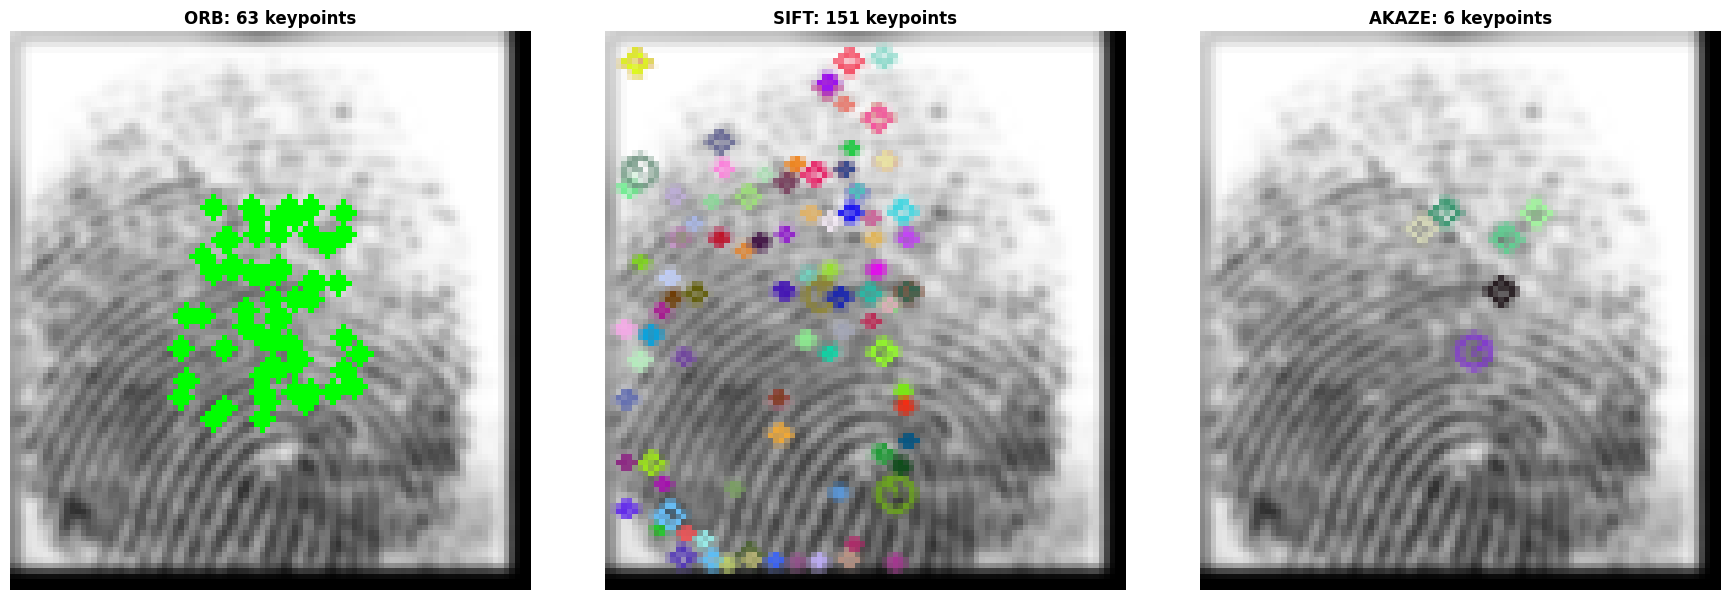


💡 Recommendation: Test AKAZE or SIFT for better matching performance
💡 Consider ensemble approach: combine multiple feature extractors


In [28]:
# IMPROVEMENT 2: Compare Multiple Feature Extraction Methods
print("="*70)
print("IMPROVEMENT 2: FEATURE EXTRACTION COMPARISON")
print("="*70)

def extract_sift_features(image):
    """Extract SIFT features (if available)"""
    try:
        sift = cv2.SIFT_create(nfeatures=500)
        keypoints, descriptors = sift.detectAndCompute(image, None)
        
        # Convert to compatible format
        features = {
            'keypoints': [{'pt': kp.pt, 'size': kp.size, 'angle': kp.angle} for kp in keypoints],
            'descriptors': descriptors
        }
        return features, keypoints
    except Exception as e:
        print(f"SIFT not available: {e}")
        return None, None

def extract_akaze_features(image):
    """Extract AKAZE features (more robust alternative)"""
    akaze = cv2.AKAZE_create()
    keypoints, descriptors = akaze.detectAndCompute(image, None)
    
    features = {
        'keypoints': [{'pt': kp.pt, 'size': kp.size, 'angle': kp.angle} for kp in keypoints],
        'descriptors': descriptors
    }
    return features, keypoints

# Prepare test image with advanced preprocessing
def advanced_preprocess(image):
    """Advanced fingerprint preprocessing using CLAHE"""
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
    enhanced = clahe.apply(image)
    blurred = cv2.GaussianBlur(enhanced, (5, 5), 0)
    normalized = cv2.normalize(blurred, None, 0, 255, cv2.NORM_MINMAX)
    return normalized

# Load and preprocess test image
test_fp = cv2.imread(dataset_files[0], cv2.IMREAD_GRAYSCALE)
test_img = advanced_preprocess(test_fp)

# Current ORB method
orb_features = fp_system.extract_features(test_img)
print(f"ORB features: {len(orb_features['keypoints'])} keypoints")

# SIFT method
sift_features, sift_kp = extract_sift_features(test_img)
if sift_features:
    print(f"SIFT features: {len(sift_features['keypoints'])} keypoints")

# AKAZE method
akaze_features, akaze_kp = extract_akaze_features(test_img)
print(f"AKAZE features: {len(akaze_features['keypoints'])} keypoints")

# Visualize keypoints
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# ORB
img_orb = cv2.cvtColor(test_img.copy(), cv2.COLOR_GRAY2BGR)
for kp_data in orb_features['keypoints'][:100]:  # Limit for visibility
    x, y = int(kp_data['pt'][0]), int(kp_data['pt'][1])
    cv2.circle(img_orb, (x, y), 2, (0, 255, 0), -1)
axes[0].imshow(cv2.cvtColor(img_orb, cv2.COLOR_BGR2RGB))
axes[0].set_title(f'ORB: {len(orb_features["keypoints"])} keypoints', fontsize=12, fontweight='bold')
axes[0].axis('off')

# SIFT
if sift_kp:
    img_sift = cv2.drawKeypoints(test_img, sift_kp[:100], None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
    axes[1].imshow(cv2.cvtColor(img_sift, cv2.COLOR_BGR2RGB))
    axes[1].set_title(f'SIFT: {len(sift_kp)} keypoints', fontsize=12, fontweight='bold')
    axes[1].axis('off')
else:
    axes[1].text(0.5, 0.5, 'SIFT not available', ha='center', va='center', transform=axes[1].transAxes)
    axes[1].axis('off')

# AKAZE
img_akaze = cv2.drawKeypoints(test_img, akaze_kp[:100], None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
axes[2].imshow(cv2.cvtColor(img_akaze, cv2.COLOR_BGR2RGB))
axes[2].set_title(f'AKAZE: {len(akaze_kp)} keypoints', fontsize=12, fontweight='bold')
axes[2].axis('off')

plt.tight_layout()
plt.show()

print("\n💡 Recommendation: Test AKAZE or SIFT for better matching performance")
print("💡 Consider ensemble approach: combine multiple feature extractors")


IMPROVEMENT 1: ADVANCED PREPROCESSING


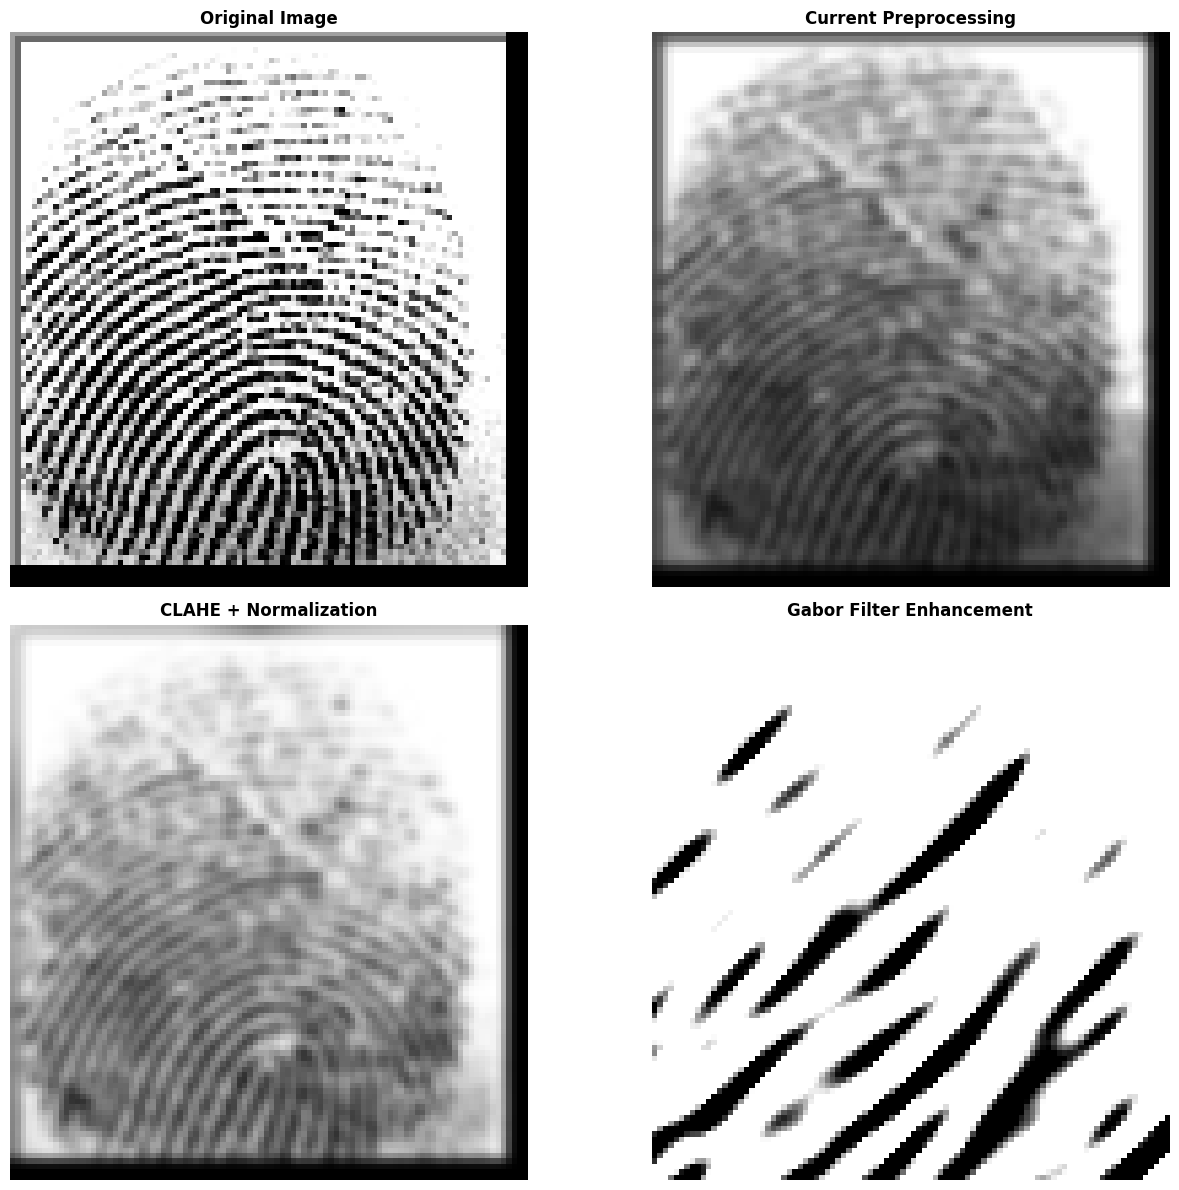


✓ Advanced preprocessing methods demonstrated
💡 Recommendation: Update FingerprintRecognition.preprocess() to use CLAHE


In [27]:
# IMPROVEMENT 1: Enhanced Preprocessing with CLAHE and Gabor Filters
print("="*70)
print("IMPROVEMENT 1: ADVANCED PREPROCESSING")
print("="*70)

def advanced_preprocess(image):
    """
    Advanced fingerprint preprocessing using CLAHE and additional filters
    """
    # 1. CLAHE for contrast enhancement
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
    enhanced = clahe.apply(image)
    
    # 2. Gaussian blur for noise reduction
    blurred = cv2.GaussianBlur(enhanced, (5, 5), 0)
    
    # 3. Normalization
    normalized = cv2.normalize(blurred, None, 0, 255, cv2.NORM_MINMAX)
    
    return normalized

def apply_gabor_filter(image, ksize=31, sigma=5.0, theta=0, lambd=10.0, gamma=0.5):
    """
    Apply Gabor filter for ridge enhancement
    """
    kernel = cv2.getGaborKernel((ksize, ksize), sigma, theta, lambd, gamma, 0, ktype=cv2.CV_32F)
    filtered = cv2.filter2D(image, cv2.CV_8UC3, kernel)
    return filtered

# Test advanced preprocessing
test_fp = cv2.imread(dataset_files[0], cv2.IMREAD_GRAYSCALE)
original_prep = fp_system.preprocess(test_fp)
advanced_prep = advanced_preprocess(test_fp)
gabor_prep = apply_gabor_filter(advanced_prep, theta=np.pi/4)

# Visualize comparison
fig, axes = plt.subplots(2, 2, figsize=(14, 12))

axes[0, 0].imshow(test_fp, cmap='gray')
axes[0, 0].set_title('Original Image', fontsize=12, fontweight='bold')
axes[0, 0].axis('off')

axes[0, 1].imshow(original_prep, cmap='gray')
axes[0, 1].set_title('Current Preprocessing', fontsize=12, fontweight='bold')
axes[0, 1].axis('off')

axes[1, 0].imshow(advanced_prep, cmap='gray')
axes[1, 0].set_title('CLAHE + Normalization', fontsize=12, fontweight='bold')
axes[1, 0].axis('off')

axes[1, 1].imshow(gabor_prep, cmap='gray')
axes[1, 1].set_title('Gabor Filter Enhancement', fontsize=12, fontweight='bold')
axes[1, 1].axis('off')

plt.tight_layout()
plt.show()

print("\n✓ Advanced preprocessing methods demonstrated")
print("💡 Recommendation: Update FingerprintRecognition.preprocess() to use CLAHE")
